<p style="float:right"><b>Name: ADITYA KUMAR SINGH<br>Roll No.: 2021701010</b></p>

Instructions:

* The goal of the assignment is to introduce you to several computer vision tasks and the use of OpenCV package.
* You need to upload a single pdf file containing:
    1. your report
    2. your code that you wrote and
    3. its output images.
    
  The file should be uploaded in the moodle portal.
* Include the assignment number, your name and roll number at the top-right of the first page of your submission (pdf).
* Make sure that the assignment that you submit is your own work. Any breach of this rule could result in serious actions including an F grade in the course.
* The experiments and report writing takes time. Start your work early and do not wait till the deadline.

**Submission: Any time before Monday, 17 Jan 2022, 11:00PM**

# 1 Installing OpenCV
The first step of doing this assignment is to install the OpenCV package on your computer. OpenCV is an open source
library for developing computer vision applications. Please see: http://opencv.org for details of both installation and usage of the library. OpenCV has Linux, Windows and Mac versions available. Note that the compilation of the
library from the sources would take a few hours. Make sure you installed the required libraries before compiling and
installing OpenCV. Test your installation with a basic program to read write and modify an image. In linux, opencv
is readily available through the built in software installation utilities.

The primary goal of the assignment is the learning you get from writing the code and experimenting with various
factors. So do write a detailed account of the various experiments and your learnings in your report.

For this assignment, you are expected to write C/C++ or Python code for the tasks described in Section 2.

In [1]:
# Run this following command in your terminal opened in your designated environment (Also run here with ! mark.).
!pip install opencv-contrib-python

# 2 Chroma Keying with OpenCV

$\Large 1)$ Video ↔ Images: Write a program to convert a given video to its constituent images. Your output should be in a specified folder. Write another program that will merge a set of images in a folder into a single video. You should be able to control the frame rate in the video that is created.

In [1]:
# Import OpenCV package.
import cv2
import os
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Specify video path...
video_path = "video/"
img_path = "images/"

__Video to Images.__

- **Task**: To split the video into individual frames, with every adjacent frame taken at a time interval given by USER. For example, say 'vid.mp4' has 1000 frames in total for 100 seconds (=10 fps), and we chose to pick up **4** frames for each second (i.e., picking up frames at a time interval of 0.25 seconds).
- **Challenges**:
    - Need to find out which specific function of OpenCV (`vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)`) allows us to pick up frames at a desired rate.
    - Also found that we can't pick up frames at a lower time-interval in comparison to given fps. For example if we consider our above setting then we can't be able to pick 11 or more than 11 frames per sec.


In [3]:
def getFrame(vidcap, img_path=img_path, count=0, fps_control=False, sec=None, show=False):
    """
    Set frame per sec (fps), i.e., no. of frames per second.
    """
    if fps_control:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrame, image = vidcap.read()
    if show:
        cv2.imshow("Image Window", image)#cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if hasFrame:
        cv2.imwrite(img_path+"vid2frame"+str(count)+".jpg", image)# save frame as JPG file
    else:
        # if frame is read correctly ret is True
        print("Can't receive frame (stream end?). Exiting ...")
        exit()
    return hasFrame

In [7]:
vidcap = cv2.VideoCapture(video_path+"avg.mp4")

if not vidcap.isOpened():
    print("Error in opening Video File.")
    exit()

sec = 0
frameRate = 0.15 #//it will capture image in each 0.15 second
count=0
success = getFrame(vidcap=vidcap, img_path=img_path+"Avengers/", count=count, fps_control=True, sec=sec)
while success:
    count = count + 1
    sec = round(sec + frameRate, 2)
    success = getFrame(vidcap=vidcap, img_path=img_path+"Avengers/", count=count, fps_control=True, sec=sec)
# Release all the captured frames.
vidcap.release()
cv2.destroyAllWindows()

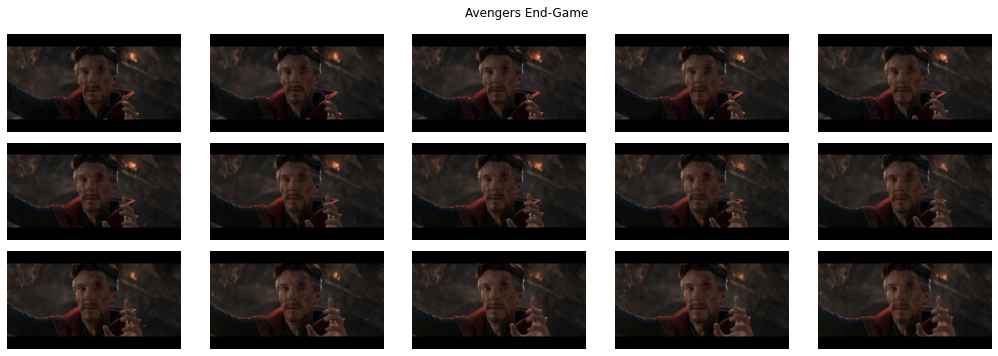

In [39]:
# Let's see some of the Images generated.
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 5))
k=0
fig.suptitle("Avengers End-Game")
for i in range(3):
    for j in range(5):
        img=cv2.cvtColor(cv2.imread(img_path+"Avengers/"+"vid2frame"+str(k)+".jpg"), cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].set_axis_off()
        k+=1
fig.tight_layout(rect=[0,0,0.95,1.0])
plt.show()

__Video From Images__

- **Task**: To generate Video by stacking Images along time dimension.
- **Challenges**:
    - Didn't know how to use `cv2.VideoWriter()` along with what format to use (=`cv2.VideoWriter_fourcc(*'MJPG')`).
    - Got stuck with `fps` argument in `cv2.VideoWriter()`, which basically is different from `fps` argument we have seen in previous task. Here `fps`= how many images should it take per second to construct the whole video. 

In [4]:
def img2vid(img_folder_path=img_path+"Avengers/", generated_vid_path="video/rodo_vid_generated.mp4", fps=2):
    """
    Construct Video from Images.
    Inputs:
        img_folder_path: Path for Images.
        generated_vid_path: Path from which video is taken.
        fps: Frame Per Sec.
        e.g., fps=1 => 1 frame per sec, while fps=0.5 => 0.5 frames per sec => 1 frame per 2 sec
    """
    # Collect Image Names
    file_names = [join(img_folder_path, f) for f in os.listdir(img_folder_path) if isfile(join(img_folder_path, f))]
    file_names.sort(key = lambda x:int(x.split("frame")[1][:-4]), reverse=False)
    # Read above Images and save them in a list.
    frame_arr = []
    for file in file_names:
        img = cv2.imread(file)
        frame_arr.append(img)
    img_shape = (img.shape[1], img.shape[0])# (width, height)
    # Create a Videowriter Object to concat the frames to generate video along time dimension.
    out = cv2.VideoWriter(generated_vid_path, cv2.VideoWriter_fourcc(*'MJPG'), fps, img_shape)
    #also *'DIVX' can be used
    for i in range(len(frame_arr)):
        # writing to a image array
        out.write(frame_arr[i])
    out.release()

__Experiment:__

In the following cell we tried to change the FPS and observed the speed in which frames are displayed.

In [4]:
img2vid(generated_vid_path="video/2_vid_generated.mp4", fps=2)
img2vid(generated_vid_path="video/8_vid_generated.mp4", fps=8)
img2vid(generated_vid_path="video/32_vid_generated.mp4", fps=32)

$\Large 2)$ Capturing Images: Learn how to capture frames from a webcam connected to your computer and save them as images in a folder. You may use either the built-in camera of your laptop or an external one connected through USB. You should also be able to display the frames (the video) on the screen while capturing.

In [5]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot Open Camera.")
    exit()

count=0
success = getFrame(img_path=img_path+"Me/", vidcap=cap, count=count, show=True)
while success:
    count = count + 1
    success = getFrame(img_path=img_path+"Me/", vidcap=cap, count=count, show=True)
    if cv2.waitKey(1) == ord('q'):
        break
# Release the VidCap and Destroy all windows
cap.release()
cv2.destroyAllWindows()

$\Large 3)$ Chroma Keying: Read about the technique of chroma keying. Following are a few good starting points:
- Introduction: http://en.wikipedia.org/wiki/Chroma key
- Alvy Ray Smith and James F Blinn, ”Blue Screen Matting”, SIGGRAPH’96.

Create an interesting composite of two videos using this technique, possibly with one video including yourselves.

__Helper Functions that replace the Background Green Screen with some USER input Image.__

- **Task**: Replace GREEN Screen at back with image given by USER. Doing this for each frame and combining them would generate teh whole video.
- **Challenges**:
    - We defined two functions `img_resizer()` and `img_placer()` and both takes argument from USER and tries to resize foreground image w.r.t to background image and also place it accordingly.
    - In `mask_the_background()` function, we construct masks (both for background and foreground) and then `add` the results to get desired image.

In [5]:
def required_divisor(scaling_val, threshold):
    div = 1
    while scaling_val > threshold:
        scaling_val //= 2
        div *= 2
    return div


# foreground Image resizer
def fg_img_resize(fg_img, bg_img, img_perc):
    """
    Asks if user wants to change fore-ground image size
    """
    fg_shape = fg_img.shape
    bg_shape = bg_img.shape
    """
    scaling function:
    1. find min among width and height for bg
    2. Along that min axis we will do scaling for fg, which will effect in other-axis too.
    """
    min_axis = np.argmin(bg_shape[:-1])  # excluding channel dim
    scale = (img_perc / 100) * (
        bg_shape[min_axis] / fg_shape[min_axis]
    )  # - wrong-formula --- np.sqrt(scale_x*scale_y*(img_perc/100))
    fg_img = cv2.resize(fg_img, (0, 0), fx=scale, fy=scale)
    return fg_img


# resize images automatically to suitable size according to given fg and bg images.
def img_resizer(fg_img, bg_img, img_perc):
    fg_shape = fg_img.shape
    bg_shape = bg_img.shape
    scale_x = bg_shape[1] / fg_shape[1]
    scale_y = bg_shape[0] / fg_shape[0]
    if (fg_shape[1] <= bg_shape[1]) or (fg_shape[0] <= bg_shape[0]):
        if scale_x > 4 or scale_y > 4:
            # here do both x and y bg downscaling unless go by user input.
            x_divisor = required_divisor(scale_x, 4)
            y_divisor = required_divisor(scale_y, 4)
            scale = max(x_divisor, y_divisor)
            bg_img = cv2.resize(bg_img, (0, 0), fx=(1 / scale), fy=(1 / scale))
        fg_img = fg_img_resize(fg_img, bg_img, img_perc)
    else:
        # check if background img is too small
        if (1 / scale_x) > 2 or (1 / scale_y) > 2:
            bg_img = cv2.resize(bg_img, (0, 0), fx=2, fy=2)
        fg_img = fg_img_resize(fg_img, bg_img, img_perc)
    return fg_img, bg_img


# Place foreground inage on background image at desired position
def img_placer(x_pos_perc, y_pos_perc, fg_img, bg_img):
    """
    Input: 
        x_pos_perc: percentage of x-co-ordinate of centre of foreground image on background - w.r.t to top left of background image.
        y_pos_perc: percentage of y-co-ordinate of centre of foreground image on background - w.r.t to top left of background image.
        fg_img: foreground image
        bg_img: background image
    Output:
        Required Co-ordinates for top left of foreground image on background image
    """
    fg_shape = fg_img.shape
    bg_shape = bg_img.shape
    return round((x_pos_perc / 100) * (bg_shape[1] - fg_shape[1])), round(
        (y_pos_perc / 100) * (bg_shape[0] - fg_shape[0]))

def mask_the_background(fg_img, bg_img, img_perc, x_pos_perc, y_pos_perc, mode="BGR"):
    """
    Input:
        fg_img: Cropped/ Focused Foreground Image
        bg_img: Background Image
        mode: "BGR" or "HSV"
    Output:
        Replaced Image with RGB format
    """
    bg_tmp = np.copy(
        bg_img
    )  # to prevent changes in original image array; as call by reference
    # Resize to convenience
    fg_img, bg_tmp = img_resizer(fg_img, bg_tmp, img_perc)
    # store the shape
    fg_shape = fg_img.shape
    # obtain the co-ordinates on background image to which foreground image is to be placed at.
    x_cord, y_cord = img_placer(x_pos_perc, y_pos_perc, fg_img, bg_tmp)
    # create mask and anti-mask for both modes
    if mode == "BGR":
        # Range of green colour in BGR.
        upper = np.array([255, 179, 255])
        lower = np.array([0, 173, 0])
        # Obtain ROI from background img where foreground is to be put.
        roi_bg = bg_tmp[y_cord:y_cord + fg_shape[0],
                        x_cord:x_cord + fg_shape[1]]
    elif mode == "HSV":
        # Range of green in HSV.
        upper = np.array([75, 255, 255])
        lower = np.array([50, 50, 50])
        fg_img = cv2.cvtColor(fg_img, cv2.COLOR_BGR2HSV)
        bg_tmp = cv2.cvtColor(bg_tmp, cv2.COLOR_BGR2HSV)
        # Obtain ROI from background img where foreground is to be put.
        roi_bg = bg_tmp[y_cord:y_cord + fg_shape[0],
                        x_cord:x_cord + fg_shape[1]]
    # Mask that allows green to display == Construction of anti-mask (1-bit image)
    rgb_anti_mask = cv2.inRange(fg_img, lower, upper)
    # Mask that display foreground, and blocks green
    rgb_mask = cv2.bitwise_not(rgb_anti_mask)
    # Apply anti-mask on ROI obtained from Background image, so as to display the background part.
    masked_roi = cv2.bitwise_and(roi_bg, roi_bg, mask=rgb_anti_mask)
    # Apply mask on fg
    masked_fg = cv2.bitwise_and(fg_img, fg_img, mask=rgb_mask)
    # Add both masked entities and put that back in original image
    bg_tmp[y_cord:y_cord + fg_shape[0],
           x_cord:x_cord + fg_shape[1]] = cv2.add(masked_roi, masked_fg)
    if mode == "BGR":
        return bg_tmp
    else:
        return cv2.cvtColor(bg_tmp, cv2.COLOR_HSV2BGR)

__Functions to capture the given-video and replace the Green Screen Frame by Frame.__

In [17]:
def video_chroma_keying(fgVid, bgVid, file_name, out_shape, out_fps):
    """
    Inputs:
        fgVid: fore-ground captured video
        bgVid: Back-ground captured video
        file_name: The name for the video file
        out_shape: Output Shape of Video Frames
        out_fps: FPS for Output Video
    Outputs:
        fgVid on bgVid
    """
    # ask from user what should be the size of fg image w.r.t bg in terms of %
    img_perc = int(
        input(
            "Enter what percentage of shortest dimension (excluding channel) of background image should be covered by foreground image: "
        ))
    # asks for perfect positioning.
    x_pos_perc = int(
        input(
            "Enter the distance percentage in x-direction for top-left of foreground image to be placed on background: "
        ))
    y_pos_perc = int(
        input(
            "Enter the distance percentage in y-direction for top-left of foreground image to be placed on background: "
        ))
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    out = cv2.VideoWriter(file_name+'.mp4', fourcc, out_fps, (out_shape[1], out_shape[0]))
    
    while fgVid.isOpened() and bgVid.isOpened():
        # Read the Video frames from both Foreground and Background.
        fgret, fgframe = fgVid.read()
        bgret, bgframe = bgVid.read()
        # if frame is read correctly --> ret is True
        if not (fgret and bgret):
            print("Can't receive frame (stream end?). Exiting ...")
            break
        # Show both foreground and Background
        cv2.imshow("Fore-Ground Video", fgframe)
        cv2.imshow("Back-Ground Video", bgframe)
        # Chroma-Keying code.
        mod_frame = mask_the_background(fgframe, bgframe, img_perc, x_pos_perc, y_pos_perc, mode="HSV")
        # Write the video obtained into VideoWriter Object. 
        out.write(mod_frame)
        cv2.imshow('Background Replaced - Video', mod_frame)
        if cv2.waitKey(1) == ord('q'):
            break
    # Release everything if job is finished
    fgVid.release()
    bgVid.release()
    out.release()
    cv2.destroyAllWindows()

In [24]:
vidcap1 = cv2.VideoCapture(video_path+'man-dance.mp4')
vidcap1_bg = cv2.VideoCapture(video_path+'man-back.mp4')

In [30]:
# Call the above function.
video_chroma_keying(fgVid=vidcap1, bgVid=vidcap1_bg, file_name=video_path+"man-in-disco", out_fps=30, out_shape=(1080, 1920))

Enter what percentage of shortest dimension (excluding channel) of background image should be covered by foreground image:  80
Enter the distance percentage in x-direction for top-left of foreground image to be placed on background:  50
Enter the distance percentage in y-direction for top-left of foreground image to be placed on background:  50


Can't receive frame (stream end?). Exiting ...


In [29]:
def frames_displayer(vidcap, vidcap_bg, vidcap_combined, title="Man In Disco!", k=15):
    """Show kth frames"""
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(title, fontsize=25)
    for _ in range(k):
        fgret, fgframe = vidcap.read()
        bgret, bgframe = vidcap_bg.read()
        combret, combframe = vidcap_combined.read()
    if not (fgret and bgret and combret):
        print("Can't receive frame (stream end?). Exiting ...")
    else:
        ax[0].imshow(cv2.cvtColor(fgframe, cv2.COLOR_BGR2RGB))
        ax[0].set_axis_off()
        ax[1].imshow(cv2.cvtColor(bgframe, cv2.COLOR_BGR2RGB))
        ax[1].set_axis_off()
        ax[2].imshow(cv2.cvtColor(combframe, cv2.COLOR_BGR2RGB))
        ax[2].set_axis_off()
    fig.tight_layout(rect=[0,0,0.97,1]);plt.show()
    # release all the frames.
    vidcap.release()
    vidcap_bg.release()
    vidcap_combined.release()
    cv2.destroyAllWindows()

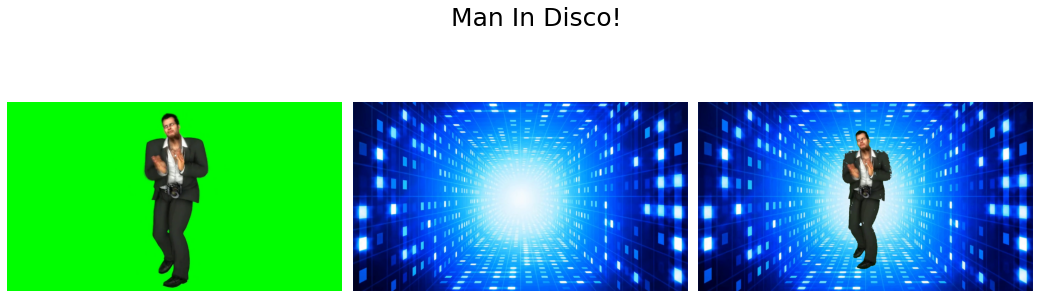

In [25]:
# VideoCapture Object for Combined Video...
vidcap_combined = cv2.VideoCapture(video_path+'man-in-disco.mp4')

frames_displayer(vidcap1, vidcap1_bg, vidcap_combined, k=15)

In [31]:
vidcap2 = cv2.VideoCapture(video_path+'t-rex.mp4')
vidcap2_bg = cv2.VideoCapture(video_path+'nature-back.mp4')

In [28]:
video_chroma_keying(fgVid=vidcap2, bgVid=vidcap2_bg, file_name=video_path+"trex-in-jungle", out_fps=50, out_shape=(720, 1280))

Enter what percentage of shortest dimension (excluding channel) of background image should be covered by foreground image:  80
Enter the distance percentage in x-direction for top-left of foreground image to be placed on background:  50
Enter the distance percentage in y-direction for top-left of foreground image to be placed on background:  50


Can't receive frame (stream end?). Exiting ...


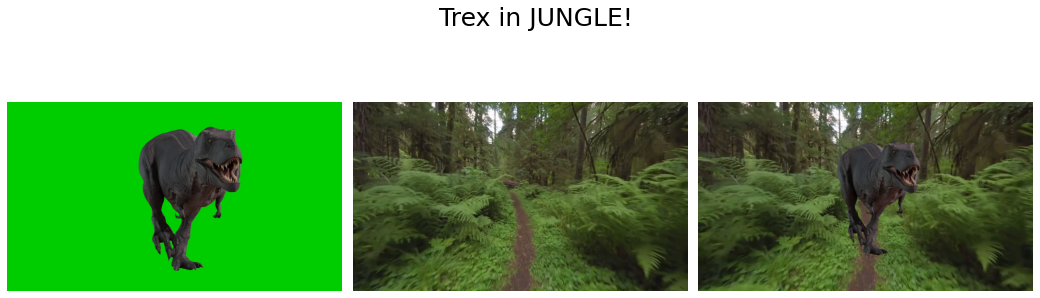

In [32]:
# VideoCapture Object for Combined Video...
vidcap_combined2 = cv2.VideoCapture(video_path+'trex-in-jungle.mp4')

frames_displayer(vidcap2, vidcap2_bg, vidcap_combined2,  title="Trex in JUNGLE!", k=15)